In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scanpy as sc
import scanpy.external as sce
import harmonypy as hm

In [2]:
adata = sc.read_h5ad("scanpy/iGlut_post_scaled.h5ad")

In [3]:
adata.obs['sample'].value_counts()

iGlut_post_p1    101395
iGlut_post_p2     83036
Name: sample, dtype: int64

In [4]:
sce.pp.harmony_integrate(adata, 'sample',max_iter_harmony=20,plot_convergence=True)
#ho = hm.run_harmony() 

2023-04-24 13:57:21,236 - harmonypy - INFO - Iteration 1 of 20
2023-04-24 14:02:17,301 - harmonypy - INFO - Iteration 2 of 20
2023-04-24 14:07:03,285 - harmonypy - INFO - Iteration 3 of 20
2023-04-24 14:09:52,794 - harmonypy - INFO - Converged after 3 iterations


In [5]:
'X_pca_harmony' in adata.obsm 

True

In [6]:
adata.obsm['X_pca_harmony'].shape

(184431, 150)

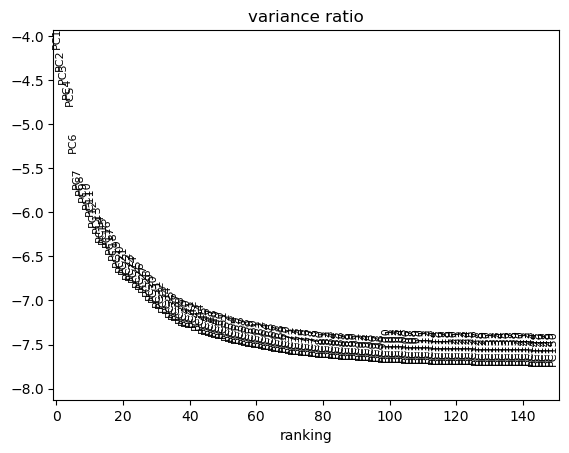

In [7]:
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']
sc.pl.pca_variance_ratio(adata, log=True, n_pcs=150, save=False) # scanpy generates the filename automatically 

In [8]:
adata.write_h5ad("scanpy/iGlut_post_harmony.h5ad")